In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from sklearn import metrics as m

In [2]:
#import data from local file
data=open('F:\TOPO_DATA.csv')

#Read data using pandas' read_csv method
Topo_Data=pd.read_csv(data, index_col='S/N')

#Change Columns' names
Topo_Data.columns=['Easting','Northing','Spot_Height']

#View data
Topo_Data.head(5)

,Easting,Northing,Spot_Height
S/N,,,
1,544079.776,720172.309,1.012
2,543279.402,720468.302,1.021
3,543279.472,720468.390,1.025
4,542778.571,720464.031,1.032
5,544080.839,720170.246,1.046


In [3]:
#Check Nunmber of instances
print('Number of instances, No of features')
Topo_Data.shape[0],Topo_Data.shape[1]

Number of instances, No of features


(9373, 3)

In [75]:
#Create data split function
def data_split(data):
    random_state=1
    Split_idx=np.random.permutation(len(data))
    n_ins=int(0.20*len(data))#no of instances
    Test_idx=Split_idx[:n_ins]
    Train_idx=Split_idx[n_ins:]
    return data.iloc[Train_idx],data.iloc[Test_idx]

Train_data,Test_Data=data_split(Topo_Data)
cols=['Easting','Northing']
Needed_Train=Train_data[cols].copy()
Needed_Target=Train_data['Spot_Height']
Needed_testdata=Test_Data[cols].copy()

In [70]:
#cluster using MeanShift Clusterer
#calculate data bandwidth
bandwidth_T = estimate_bandwidth(Needed_Train, quantile=0.1, n_samples=len(Needed_Train))

# Cluster data with MeanShift
MS_model = MeanShift(bandwidth=bandwidth_T, bin_seeding=True)
MS_model.fit(Needed_Train)

MeanShift(bandwidth=234.34752830989976, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [71]:
# Extract the centers of clusters
cluster_centers = MS_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

#Extract the number of clusters:
# Estimate the number of clusters
labels = MS_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)


Centers of clusters:
 [[543297.45937306 719891.16187306]
 [543259.04619478 720435.76469519]
 [543830.34055687 719987.672877  ]
 [542912.85840541 720474.35522222]
 [544283.06801927 720353.42424694]
 [543859.02553649 719642.04797239]
 [543900.0014064  719220.55234975]
 [543635.69266102 720465.59444068]]

Number of clusters in input data = 8


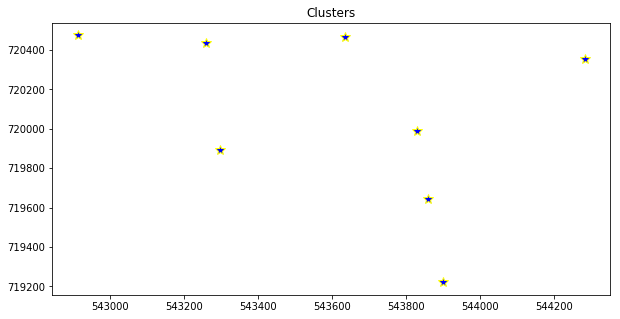

In [47]:
#Visualize and cluster centers
plt.figure(figsize=(10,5))
markers ='o*xv+x.^'
for i, marker in zip(range(num_clusters),markers):
    #plt.scatter(Needed_Train[(labels==i),0],Needed_Train[(labels==i),1],marker=marker,color='red')
    cluster_center=cluster_centers[i]
    plt.plot(cluster_center[0],cluster_center[1],marker='*',markerfacecolor='blue', markeredgecolor='yellow',markersize=10)
plt.title('Clusters')
plt.show()

In [13]:
# Evaluating quality of clusters using silhouette scores
scores=[]
values = np.arange(1, 9)
for num_clusters in values:
    score = m.silhouette_score(Needed_Train, MS_model.labels_,metric='euclidean', sample_size=len(Needed_Train))
    print("\nNumber of cluster =", num_clusters)
    print("Silhouette score =",score)
scores.append(score)


Number of cluster = 1
Silhouette score = 0.5193993313317863

Number of cluster = 2
Silhouette score = 0.5193993313317863

Number of cluster = 3
Silhouette score = 0.5193993313317863

Number of cluster = 4
Silhouette score = 0.5193993313317863

Number of cluster = 5
Silhouette score = 0.5193993313317863

Number of cluster = 6
Silhouette score = 0.5193993313317863

Number of cluster = 7
Silhouette score = 0.5193993313317863

Number of cluster = 8
Silhouette score = 0.5193993313317863


In [52]:
#A trial with Affinity Propagation Clusterer
from sklearn import covariance, cluster

# Create a graph model
edge_model = covariance.GraphicalLassoCV(cv=5)

In [53]:
# Train the model
with np.errstate(invalid='ignore'):
    edge_model.fit(Needed_Train)

In [54]:
# Build clustering model using Affinity Propagation model
k,labels = cluster.affinity_propagation(edge_model.covariance_)
num_labels = labels.max()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\affinity_propagation_.py:125: UserWarning: All samples have mutually equal similarities. Returning arbitrary cluster center(s).
  warnings.warn("All samples have mutually equal similarities. "


In [74]:

for i in range(num_labels + 1):
    print("Cluster", i+1, "==>",(Needed_Target[labels==i]))

Cluster 1 ==> S/N
1532    3.076
1134    2.499
2745    3.850
5750    5.256
7914    6.023
6136    5.411
9127    7.481
8572    6.488
449     1.791
7993    6.048
9104    7.387
5436    5.174
749     2.004
5073    5.035
7155    5.775
5008    5.004
4563    4.810
7740    5.986
594     1.925
3335    4.182
319     1.664
656     1.955
5600    5.223
4299    4.683
6878    5.687
2723    3.835
6429    5.504
698     1.970
6038    5.378
1987    3.418
        ...  
888     2.149
468     1.813
6282    5.455
2309    3.530
9276    8.394
3874    4.442
978     2.268
6559    5.553
7582    5.930
1257    2.712
127     1.329
6856    5.677
2968    4.002
1706    3.217
5761    5.259
3247    4.124
2714    3.828
11      1.080
1839    3.302
3654    4.325
5914    5.316
8258    6.149
8967    6.951
1333    2.816
7108    5.755
16      1.134
1561    3.097
7572    5.927
2938    3.982
5318    5.133
Name: Spot_Height, Length: 2383, dtype: float64
Cluster 2 ==> S/N
6623    5.580
6395    5.492
5514    5.197
1434    2.946
7422  

In [166]:
#Let's try predict clusters of test dataset using MeanShift model
cluster_predicts=MS_model.predict(Needed_testdata)
Predicted_Cluster_Number=list(cluster_predicts)
Pred_table=pd.DataFrame(Predicted_Cluster_Number,columns=['Instance_Predicted_Cluster_Number'])

Pred_table[:5]

,Instance_Predicted_Cluster_Number
0,4
1,0
2,5
3,0
4,3


In [167]:
Needed_testdata[:5]

,Easting,Northing
S/N,,
701,544139.684,720369.567
887,543376.846,719940.544
8623,543725.192,719774.536
4177,543163.795,720101.313
137,542781.530,720459.801
